Import necessary libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
df = pd.read_csv("Amazon Sale Report.csv",encoding='unicode_escape')
    

In [22]:
df.shape

(128976, 21)

In [23]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [26]:
# drop unrelated/blank columns
df.drop(columns=['New','PendingS'],axis=1,inplace=True)

In [27]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [29]:
# % of null values
(df.currency.isnull().sum())*100/df.shape[0]

6.047636769631559

In [30]:
(df.Amount.isnull().sum())*100/df.shape[0]

6.047636769631559

In [32]:
(df["fulfilled-by"].isnull().sum())*100/df.shape[0]

69.55790224537898

In [33]:
# fulfilled-by columns has too much null values so we will remove it
df.drop(columns=['fulfilled-by'],axis=1,inplace=True)

In [86]:
# or can do
df.dropna(inplace=True)

In [87]:
df.shape

(121143, 18)

In [88]:
# Change datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121143 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121143 non-null  int64         
 1   Order ID            121143 non-null  object        
 2   Date                121143 non-null  datetime64[ns]
 3   Status              121143 non-null  object        
 4   Fulfilment          121143 non-null  object        
 5   Sales Channel       121143 non-null  object        
 6   ship-service-level  121143 non-null  object        
 7   Category            121143 non-null  object        
 8   Size                121143 non-null  object        
 9   Courier Status      121143 non-null  object        
 10  Quantity            121143 non-null  int64         
 11  currency            121143 non-null  object        
 12  Amount              121143 non-null  float64       
 13  ship-city           121143 no

In [89]:
df['ship-postal-code'] = df['ship-postal-code'].astype('float')

In [40]:
df.Date = pd.to_datetime(df.Date)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121143 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121143 non-null  int64         
 1   Order ID            121143 non-null  object        
 2   Date                121143 non-null  datetime64[ns]
 3   Status              121143 non-null  object        
 4   Fulfilment          121143 non-null  object        
 5   Sales Channel       121143 non-null  object        
 6   ship-service-level  121143 non-null  object        
 7   Category            121143 non-null  object        
 8   Size                121143 non-null  object        
 9   Courier Status      121143 non-null  object        
 10  Qty                 121143 non-null  int64         
 11  currency            121143 non-null  object        
 12  Amount              121143 non-null  float64       
 13  ship-city           121143 no

In [42]:
# rename columns
df.rename(columns={"Qty":"Quantity"},inplace=True)

In [43]:
df.describe()

,index,Quantity,Amount,ship-postal-code
count,121143.000000,121143.000000,121143.000000,121143.000000
mean,64486.312655,0.961252,648.576874,463623.724507
std,37220.415404,0.214276,281.196896,191301.588170
min,0.000000,0.000000,0.000000,110001.000000
25%,32294.500000,1.000000,449.000000,382421.000000
50%,64477.000000,1.000000,605.000000,500032.000000
75%,96682.500000,1.000000,788.000000,600020.000000
max,128974.000000,8.000000,5584.000000,989898.000000


In [44]:
df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country
count,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143
unique,112861,12,2,1,2,9,11,3,1,8697,68,1
top,171-5057375-2831560,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN
freq,12,77589,83629,121143,82713,47038,20965,109458,121143,10675,21084,121143


# Exploratory Data Analysis

In [46]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

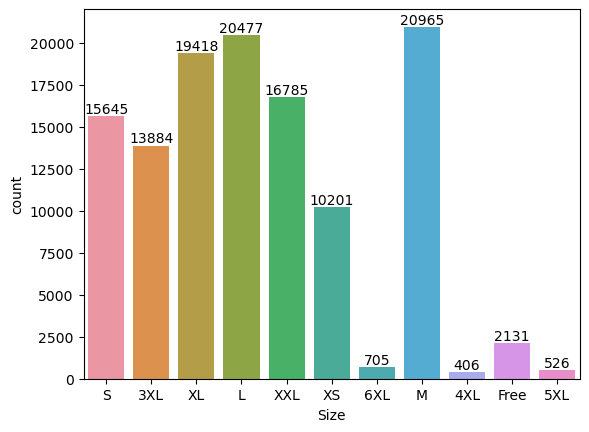

In [48]:
ax=sns.countplot(x='Size',data=df)
for label in ax.containers:
    ax.bar_label(label)

from above graph we can conclude that most of the people purchase M size

In [51]:
group_by_qty = df.groupby(['Size'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)

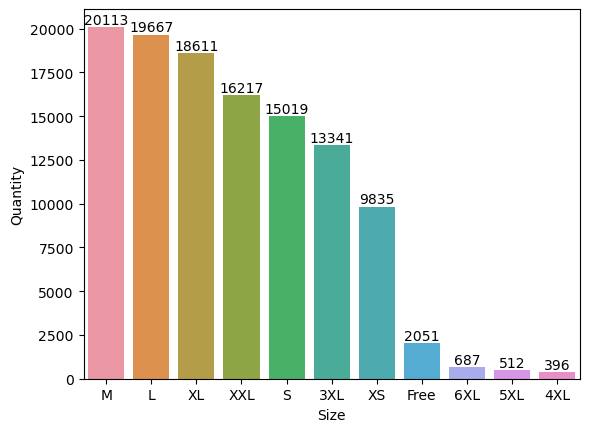

In [54]:
ax = sns.barplot(x='Size',y='Quantity',data=group_by_qty)
for bar in ax.containers:
    ax.bar_label(bar)

NOTE : From above graph you can see that most of the Quantity were bought of  M-Size 

# Courier Status

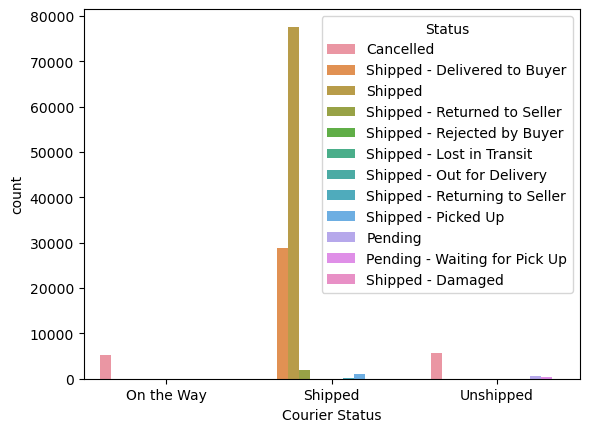

In [58]:
ax = sns.countplot(data=df,x='Courier Status',hue='Status')
plt.show()

Note : Majority of the orders are shipped 

<Axes: >

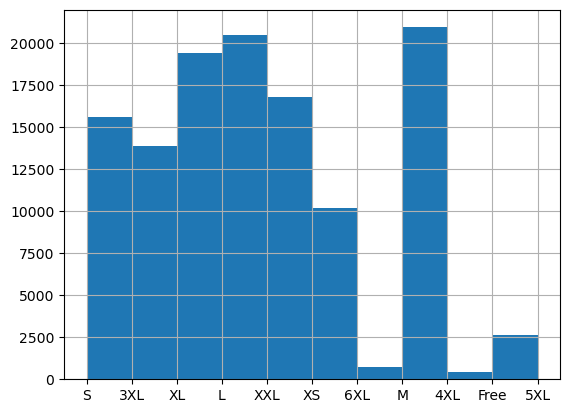

In [59]:
df['Size'].hist()

In [62]:
df.Category.unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume', 'Socks',
       'Shoes', 'Wallet', 'Watch'], dtype=object)

In [63]:
df.Category.count()

121143

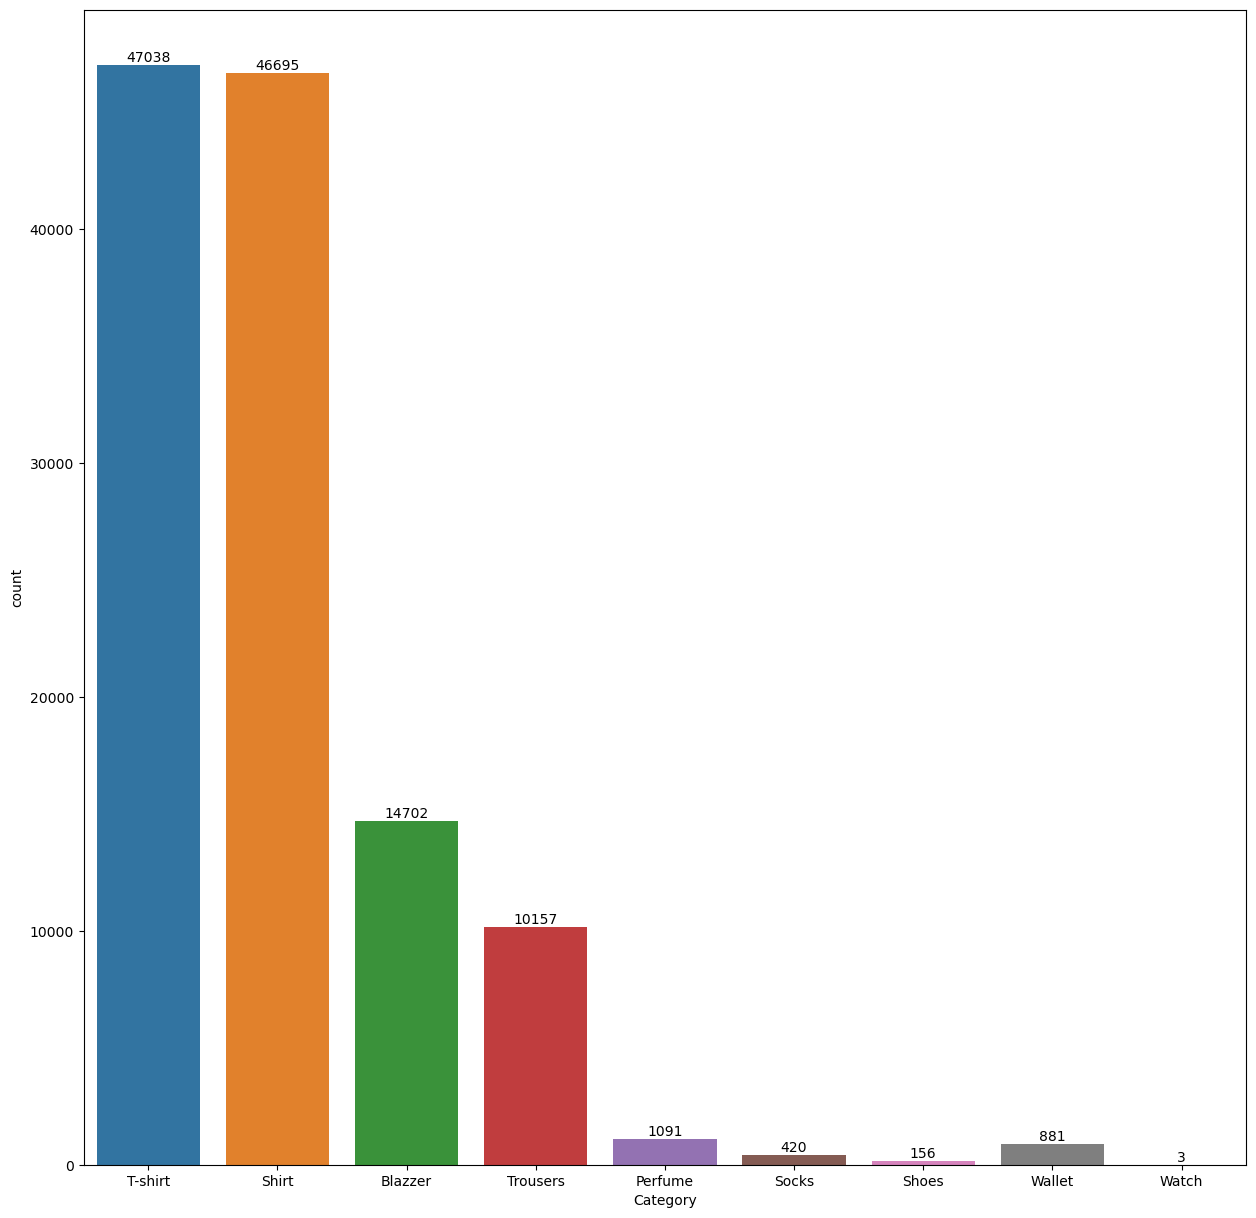

In [69]:
plt.figure(figsize=(15,15))
ax = sns.countplot(x='Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

Most Of the people bought tshirt

In [70]:
b2b_check = df.B2B.value_counts()

In [73]:
b2b_check

False    120299
True        844
Name: B2B, dtype: int64

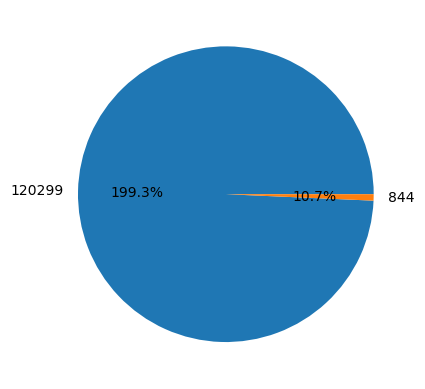

In [76]:
plt.pie(b2b_check,labels=b2b_check,autopct='1%.1f%%')
plt.show()

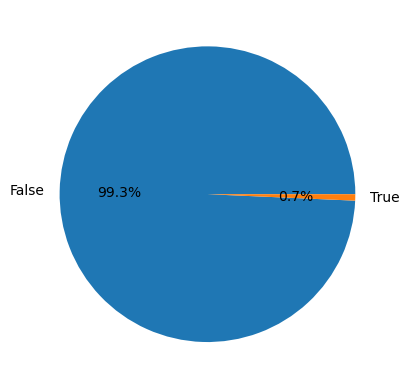

In [90]:
plt.pie(b2b_check,labels=b2b_check.index,autopct='%1.1f%%')
plt.show()

From the above chart we can conclude that 99.3 of the buyers are Retailers and 0.8% are B2B buyers

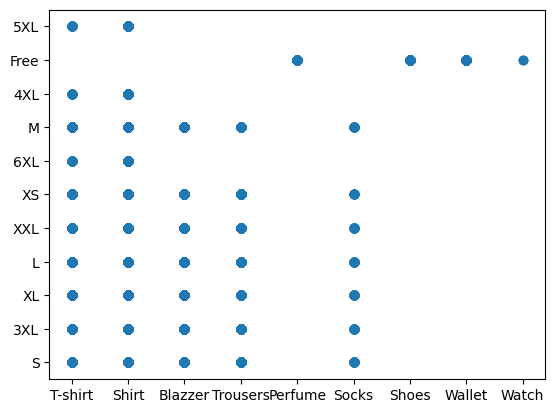

In [94]:
plt.scatter(df.Category,df.Size)

Above Graph is showing that what sizes were purchased for what categories

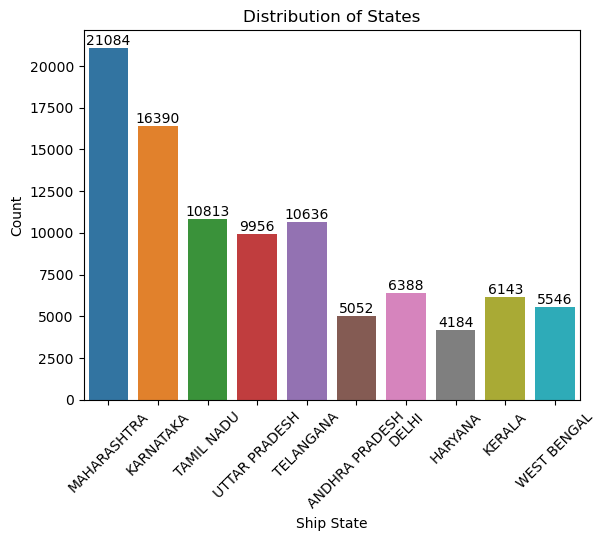

In [106]:
# top 10 Shipping States
top_10_shipping_states=df['ship-state'].value_counts().head(10)
ax = sns.countplot(data=df[df['ship-state'].isin(top_10_shipping_states.index)],x='ship-state')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Ship State')
plt.ylabel('Count')
plt.title('Distribution of States')
plt.xticks(rotation=45)
plt.show()

Maximum orders were shipped in Maharastra or Maharastra is the State that ordered the maximum orders

 CONCLUSION : The data analysis reveals that the business has a significant customer base in Maharastra State,mainly serves 
             retailers,fulfills order through Amazon, experiences high demand for T-shirts, and aees M-Size as the preferred
             choice among buyers